In [1]:
import pandas as pd
import numpy as np

customers =  pd.read_csv(r"C:\Users\Saroj\SwiggyMLProject\Data\Customers.csv") 
cuisine = pd.read_csv(r"C:\Users\Saroj\SwiggyMLProject\Data\Cuisine.csv")
dish = pd.read_csv(r"C:\Users\Saroj\SwiggyMLProject\Data\Dish.csv")
details = pd.read_csv(r"C:\Users\Saroj\SwiggyMLProject\Data\Details.csv")
orders = pd.read_csv(r"C:\Users\Saroj\SwiggyMLProject\Data\Orders.csv")
card = pd.read_csv(r"C:\Users\Saroj\SwiggyMLProject\Data\Card.csv") 


In [2]:
customers.head()

,user_id,name,email,password
0,1,Aniket,Aniket@gmail.com,p252h
1,2,Khushboo,Khushboo@gmail.com,hxn9b
2,3,Vartika,Vartika@gmail.com,9hu7j
3,4,Khushboo,Khushboo@yahoo.com,lkko3
4,5,Nutan,Nutan@yahoo.com,3i7qm


In [3]:
cuisine.head()

,r_id,r_name,cuisine,address,city,state,zipcode,phone
0,1,dominos,Italian,123 Main St,Anytown,CA,31312,333-4231
1,2,kfc,American,433 Oak St,Anytown,CA,23432,342-4535
2,3,box8,North Indian,St 457,Anytown,CA,12233,411-3453
3,4,Dosa Plaza,South Indian,824 Oak St,Anytown,CA,23432,242-2311
4,5,China Town,Chinese,983 Elm St,Anytown,CA,76676,434-6544


In [4]:
dish.head()

,f_id,f_name,type
0,1,Non-veg Pizza,Non-veg
1,2,Veg Pizza,Veg
2,3,Choco Lava cake,Veg
3,4,Chicken Wings,Non-veg
4,5,Chicken Popcorn,Non-veg


In [5]:
details.head()

,id,order_id,f_id
0,1,1001,1
1,2,1001,3
2,3,1002,4
3,4,1002,3
4,5,1003,6


In [6]:
orders.head()

,order_id,user_id,r_id,amount,date,delivery_time,delivery_rating,restaurant_rating
0,1001,1,1,550.0,2022-05-10,25.0,5.0,3.0
1,1002,1,2,415.0,2022-05-26,19.0,5.0,2.0
2,1003,1,3,240.0,2022-06-15,29.0,4.0,NaN
3,1004,1,3,240.0,2022-06-29,42.0,3.0,5.0
4,1005,1,3,220.0,2022-07-10,58.0,1.0,4.0


In [7]:
card.head()

,menu_id,r_id,f_id,price
0,1,1,1,450.0
1,2,1,2,400.0
2,3,1,3,100.0
3,4,2,3,115.0
4,5,2,4,230.0


In [8]:
df = orders.merge(customers, on = "user_id", how = "left")
df = df.merge(cuisine, on = "r_id", how = "left")
df = df.merge(details, on = "order_id", how = "left")
df = df.merge(dish, on ="f_id", how = "left")
df = df.merge(card, on = ["r_id","f_id"], how = "left")
df.head()

,order_id,user_id,r_id,amount,date,delivery_time,delivery_rating,restaurant_rating,name,email,...,city,state,zipcode,phone,id,f_id,f_name,type,menu_id,price
0,1001,1,1,550.0,2022-05-10,25.0,5.0,3.0,Aniket,Aniket@gmail.com,...,Anytown,CA,31312,333-4231,1,1,Non-veg Pizza,Non-veg,1.0,450.0
1,1001,1,1,550.0,2022-05-10,25.0,5.0,3.0,Aniket,Aniket@gmail.com,...,Anytown,CA,31312,333-4231,2,3,Choco Lava cake,Veg,3.0,100.0
2,1002,1,2,415.0,2022-05-26,19.0,5.0,2.0,Aniket,Aniket@gmail.com,...,Anytown,CA,23432,342-4535,3,4,Chicken Wings,Non-veg,5.0,230.0
3,1002,1,2,415.0,2022-05-26,19.0,5.0,2.0,Aniket,Aniket@gmail.com,...,Anytown,CA,23432,342-4535,4,3,Choco Lava cake,Veg,4.0,115.0
4,1003,1,3,240.0,2022-06-15,29.0,4.0,NaN,Aniket,Aniket@gmail.com,...,Anytown,CA,12233,411-3453,5,6,Rice Meal,Veg,8.0,160.0


In [9]:
data = df.copy()

In [10]:
data['date'] = pd.to_datetime(data['date'])

In [11]:
data['day_of_week'] = data['date'].dt.dayofweek
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['is_weekend'] = data['date'].dt.dayofweek.isin([5,6]).astype(int)

In [12]:
# prepare all aggregates
cust = data.groupby('user_id').agg(
    customer_total_orders=('order_id', 'count'),
    customer_avg_amount=('amount', 'mean'),
    customer_avg_rating=('delivery_rating', 'mean')
).reset_index()

# merge once
data = data.merge(cust, on='user_id', how='left')
print(data)

    order_id  user_id  r_id  amount       date  delivery_time  \
0       1001        1     1   550.0 2022-05-10           25.0   
1       1001        1     1   550.0 2022-05-10           25.0   
2       1002        1     2   415.0 2022-05-26           19.0   
3       1002        1     2   415.0 2022-05-26           19.0   
4       1003        1     3   240.0 2022-06-15           29.0   
5       1003        1     3   240.0 2022-06-15           29.0   
6       1004        1     3   240.0 2022-06-29           42.0   
7       1004        1     3   240.0 2022-06-29           42.0   
8       1005        1     3   220.0 2022-07-10           58.0   
9       1005        1     3   220.0 2022-07-10           58.0   
10      1006        2     1   950.0 2022-06-10           16.0   
11      1006        2     1   950.0 2022-06-10           16.0   
12      1006        2     1   950.0 2022-06-10           16.0   
13      1007        2     2   530.0 2022-06-23           60.0   
14      1007        2    

In [13]:
# Average delivery time for restaurant
rest_avg_delivery = data.groupby('r_id')['delivery_time'].mean().rename("restaurant_avg_delivery_time")

# Avg restaurant rating
rest_avg_rating = data.groupby('r_id')['restaurant_rating'].mean().rename("restaurant_avg_rating")

data = data.merge(rest_avg_delivery, on='r_id', how='left')
data = data.merge(rest_avg_rating, on='r_id', how='left')


In [14]:
# Items count per order
order_item_count = data.groupby('order_id')['f_id'].count().rename("items_in_order")

data = data.merge(order_item_count, on='order_id', how='left')


In [15]:
data['price_per_item'] = data['price']   # already available from card table


In [16]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['name', 'email', 'cuisine', 'f_name', 'type', 'r_name', 'city', 'state']

le = LabelEncoder()

for col in cat_cols:
    data[col] = le.fit_transform(data[col].astype(str))


In [17]:
data = data.fillna(data.mean(numeric_only=True))


In [18]:
final_df = data[[
    'amount','day_of_week','month','day','is_weekend',
    'customer_total_orders','customer_avg_amount','customer_avg_rating',
    'restaurant_avg_delivery_time','restaurant_avg_rating',
    'items_in_order','price_per_item',
    'name','email','cuisine','f_name','type','r_name','city','state',
    'delivery_time'      # <-- TARGET
]]


In [19]:
final_df.head()

,amount,day_of_week,month,day,is_weekend,customer_total_orders,customer_avg_amount,customer_avg_rating,restaurant_avg_delivery_time,restaurant_avg_rating,...,price_per_item,name,email,cuisine,f_name,type,r_name,city,state,delivery_time
0,550.0,1,5,10,0,10,333.0,3.6,23.5000,1.800000,...,450.0,0,0,2,4,0,3,0,0,25.0
1,550.0,1,5,10,0,10,333.0,3.6,23.5000,1.800000,...,100.0,0,0,2,2,1,3,0,0,25.0
2,415.0,3,5,26,0,10,333.0,3.6,43.6875,2.000000,...,230.0,0,0,0,1,0,4,0,0,19.0
3,415.0,3,5,26,0,10,333.0,3.6,43.6875,2.000000,...,115.0,0,0,0,2,1,4,0,0,19.0
4,240.0,2,6,15,0,10,333.0,3.6,40.5000,4.666667,...,160.0,0,0,3,6,1,2,0,0,29.0


In [20]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   amount                        50 non-null     float64
 1   day_of_week                   50 non-null     int32  
 2   month                         50 non-null     int32  
 3   day                           50 non-null     int32  
 4   is_weekend                    50 non-null     int32  
 5   customer_total_orders         50 non-null     int64  
 6   customer_avg_amount           50 non-null     float64
 7   customer_avg_rating           50 non-null     float64
 8   restaurant_avg_delivery_time  50 non-null     float64
 9   restaurant_avg_rating         50 non-null     float64
 10  items_in_order                50 non-null     int64  
 11  price_per_item                50 non-null     float64
 12  name                          50 non-null     int32  
 13  email  

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, r2_score

In [22]:
df = final_df.copy() #Load cleaned dataset

In [23]:
x = df.drop(columns=["delivery_time"])
y = df["delivery_time"]

In [24]:
#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [25]:
# Train Model on Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [26]:
lr_preds = lr.predict(x_test) #Prediction  

In [27]:
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(x_train, y_train)

# Predictions for test set
rf_preds = rf.predict(x_test)

# Evaluation metrics
rf_mae = mean_absolute_error(y_test, rf_preds) # MAE tells how wrong our predictions are on average
rf_r2 = r2_score(y_test, rf_preds) # R² shows how much variance in delivery time the model is able to explain




In [28]:
print("Linear Regression:")
print(" MAE:", round(lr_mae, 2))
print(" R² Score:", round(lr_r2, 2))

print("\nRandom Forest:")
print(" MAE:", round(rf_mae, 2))
print(" R² Score:", round(rf_r2, 2))

Linear Regression:
 MAE: 5.81
 R² Score: 0.74

Random Forest:
 MAE: 6.89
 R² Score: 0.42


In [29]:
#select best model
if rf_r2 > lr_r2:
    best_model = rf
    print("\nRandom Forest is performing better. This will be our final model.")
else:
    best_model = lr
    print("\nLinear Regression is performing better. This will be our final model.")


Linear Regression is performing better. This will be our final model.


In [30]:
import pickle

with open("delivery_time_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

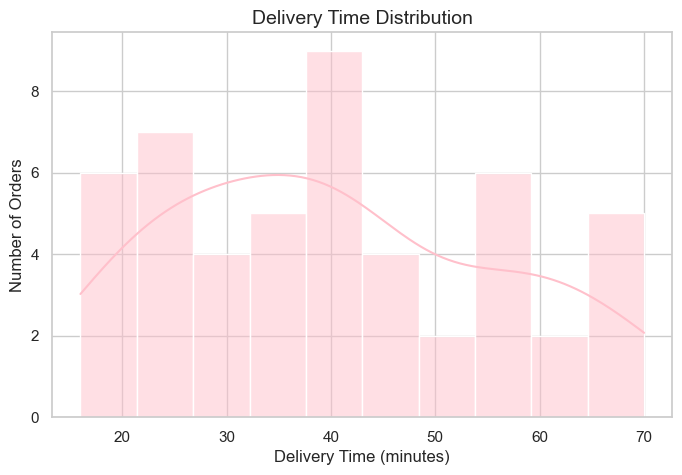

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a simple clean style
sns.set(style="whitegrid")

plt.figure(figsize=(8,5))

# Plot delivery time distribution
sns.histplot(final_df["delivery_time"], bins=10, kde=True,color = 'pink')

plt.title("Delivery Time Distribution", fontsize=14)
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Number of Orders")
plt.show()
 

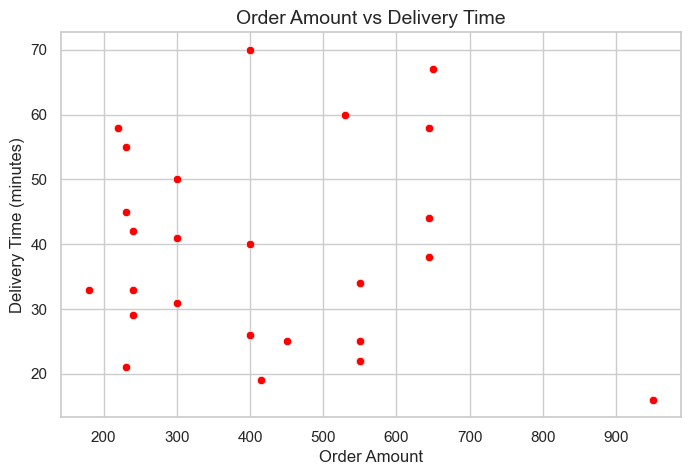

In [32]:
#Delivery Time vs Amount (Is costly order delivered faster?)
plt.figure(figsize=(8,5))

sns.scatterplot(data=final_df, x="amount", y="delivery_time", color= 'red')

plt.title("Order Amount vs Delivery Time", fontsize=14)
plt.xlabel("Order Amount")
plt.ylabel("Delivery Time (minutes)")
plt.show()


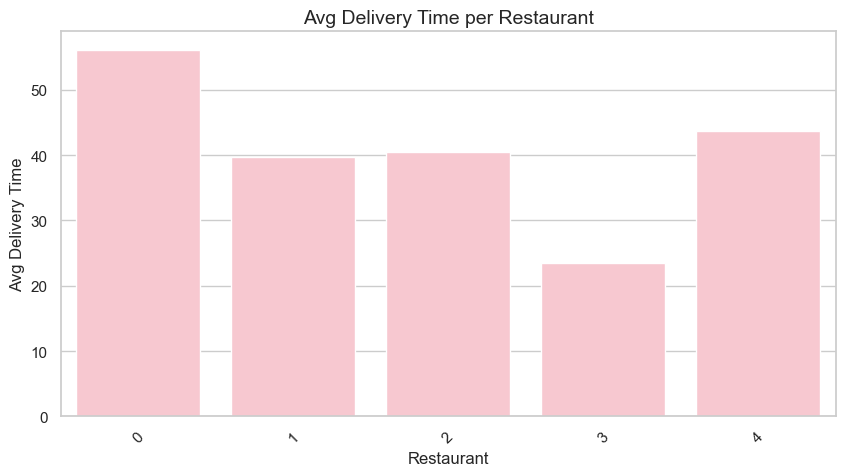

In [33]:
#Restaurant-wise Average Delivery Time
plt.figure(figsize=(10,5))

avg_time = final_df.groupby("r_name")["delivery_time"].mean().reset_index()

sns.barplot(data=avg_time, x="r_name", y="delivery_time",color = 'pink')

plt.title("Avg Delivery Time per Restaurant", fontsize=14)
plt.xlabel("Restaurant")
plt.ylabel("Avg Delivery Time")
plt.xticks(rotation=45)
plt.show()


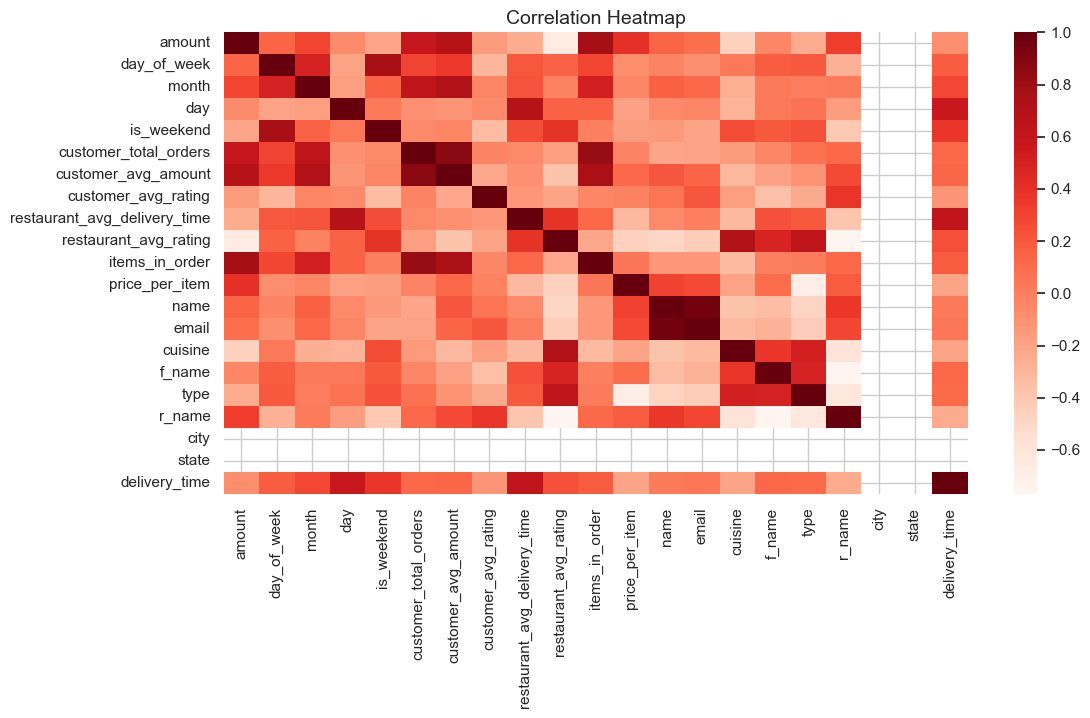

In [34]:
#Correlation Heatmap
#This shows which features influence delivery time the most.
plt.figure(figsize=(12,6))
sns.heatmap(final_df.corr(), annot=False, cmap="Reds")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


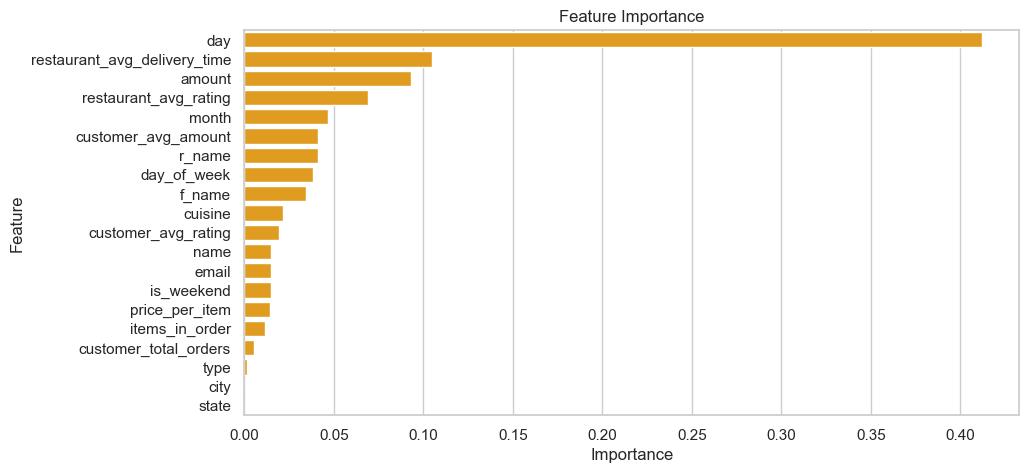

In [36]:
#Feature Selection & Importance (using Random Forest)
from sklearn.ensemble import RandomForestRegressor

x = final_df.drop(columns=["delivery_time"])
y = final_df["delivery_time"]

model = RandomForestRegressor()
model.fit(x, y)

importances = model.feature_importances_

feat_imp = pd.DataFrame({
    "Feature": x.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=feat_imp, x="Importance", y="Feature", color='orange')
plt.title("Feature Importance")
plt.show()
